# View data

## KOS data

In [1]:
vocabulary = []
with open("data/bag+of+words/vocab.kos.txt", "r") as f:
    for line in f:
        vocabulary.append(line.strip("\n"))

len(vocabulary)

6906

In [2]:
vocabulary

['aarp',
 'abandon',
 'abandoned',
 'abandoning',
 'abb',
 'abc',
 'abcs',
 'abdullah',
 'ability',
 'aboard',
 'abortion',
 'abortions',
 'abraham',
 'abrams',
 'abroad',
 'absence',
 'absent',
 'absentee',
 'absolute',
 'absolutely',
 'abstain',
 'absurd',
 'abu',
 'abuse',
 'abuses',
 'academy',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accident',
 'accidentally',
 'accidents',
 'accomplish',
 'accomplished',
 'accomplishment',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accounts',
 'accuracy',
 'accurate',
 'accurately',
 'accusations',
 'accused',
 'accusing',
 'achieve',
 'achieved',
 'achievements',
 'acknowledge',
 'acknowledged',
 'aclu',
 'act',
 'actblue',
 'acted',
 'acting',
 'action',
 'actions',
 'active',
 'actively',
 'activism',
 'activist',
 'activists',
 'activities',
 'activity',
 'actor',
 'acts',
 'actual',
 'adam',
 'adams',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',


In [9]:
import numpy as np

with open("/home/mlynatom/viz/project/data/bag+of+words/docword.kos.txt", "r") as f:
    n_docs = int(f.readline().strip())
    n_words = int(f.readline().strip())
    n_nonzero_counts = int(f.readline().strip())
    print(n_docs, n_words, n_nonzero_counts)
    counts_matrix = np.zeros((n_docs, n_words))
    for line in f:
        split_line = line.strip().split(" ")
        counts_matrix[int(split_line[0])-1,
                      int(split_line[1])-1] = int(split_line[2])

3430 6906 353160


In [10]:
counts_matrix

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer

tfdidf_transformer = TfidfTransformer()

In [14]:
tf_idf_matrix = tfdidf_transformer.fit_transform(counts_matrix)

In [18]:
tf_idf_matrix

<3430x6906 sparse matrix of type '<class 'numpy.float64'>'
	with 353160 stored elements in Compressed Sparse Row format>

## Dimension Reduction

In [48]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [43]:
def reduce_dim(reducer, data):
    reduced_matrix = reducer.fit_transform(data)
    display(reduced_matrix)
    plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])    


array([[-4.18551895e-02, -6.26247556e-02],
       [-7.29698361e-02, -1.34137446e-04],
       [ 7.47804688e-01, -3.31775096e-02],
       ...,
       [-6.28892562e-02, -6.16947816e-02],
       [-6.92623751e-02, -3.95196225e-02],
       [-8.41428091e-02, -7.87085418e-02]])

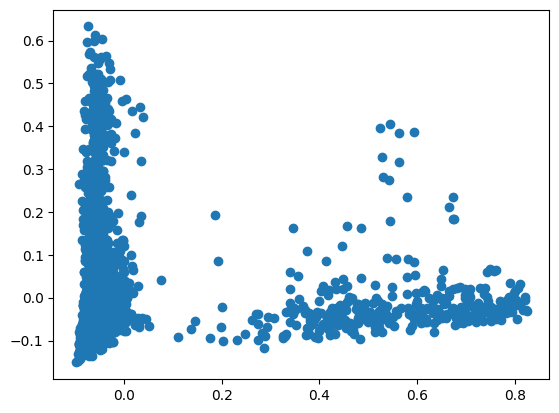

In [33]:
reduce_dim(PCA(n_components=2, svd_solver="arpack"), tf_idf_matrix)

array([[-19.009706, -16.711065],
       [-30.938526,  22.147459],
       [ 42.65913 ,  19.18847 ],
       ...,
       [ 23.042603,  19.562567],
       [ 24.029707,  18.82854 ],
       [ 24.284426,  18.653803]], dtype=float32)

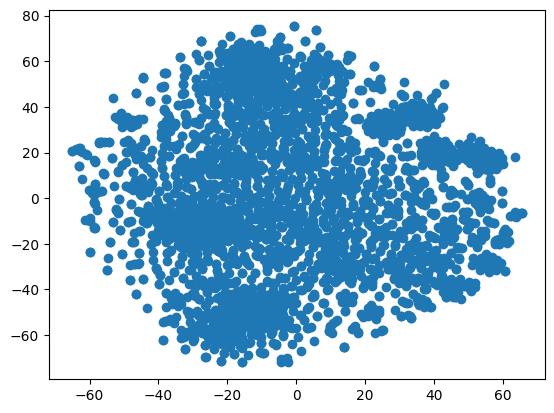

In [34]:
reduce_dim(TSNE(n_components=2, init="random"), tf_idf_matrix)

array([[-3.77871162e-05,  6.07981133e-03],
       [-1.43280177e-03,  4.75818193e-03],
       [-1.56166644e-02,  1.57561804e-02],
       ...,
       [-6.07900918e-04, -5.10284618e-03],
       [-3.21527685e-03,  2.04824733e-03],
       [ 6.19338025e-04,  2.76285358e-03]])

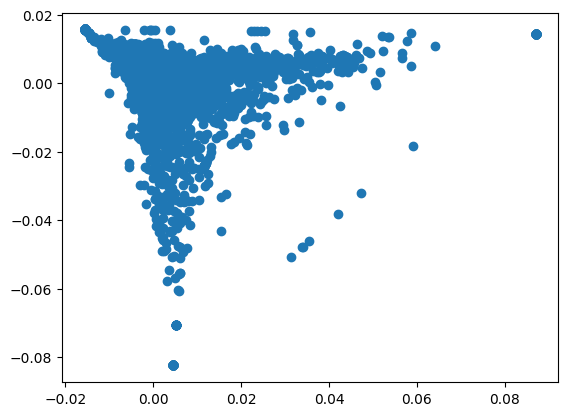

In [45]:
reduce_dim(LocallyLinearEmbedding(n_components=2), np.asarray(tf_idf_matrix.todense()))

array([[-0.41110421, -0.88425209],
       [-0.89309894, -1.33234077],
       [-1.28100256, -0.66049754],
       ...,
       [-0.07967226, -0.4278284 ],
       [-0.80182101, -1.20461064],
       [-0.71802955, -0.25838548]])

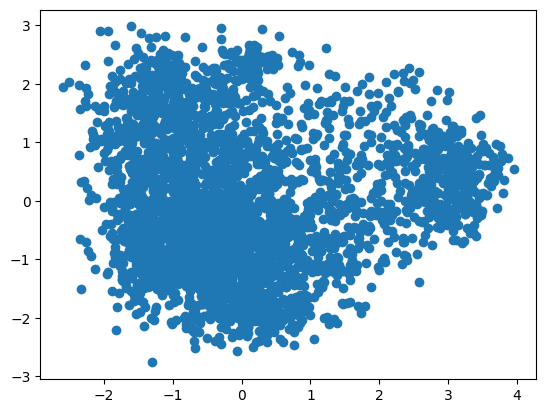

In [47]:
reduce_dim(Isomap(n_components=2), tf_idf_matrix)

array([[-0.44907949,  0.09712167],
       [-0.46957373,  0.15120606],
       [-1.05140648,  1.1707141 ],
       ...,
       [ 0.17443464, -0.12798909],
       [-0.44592501,  1.48955839],
       [-0.93666236,  1.158799  ]])

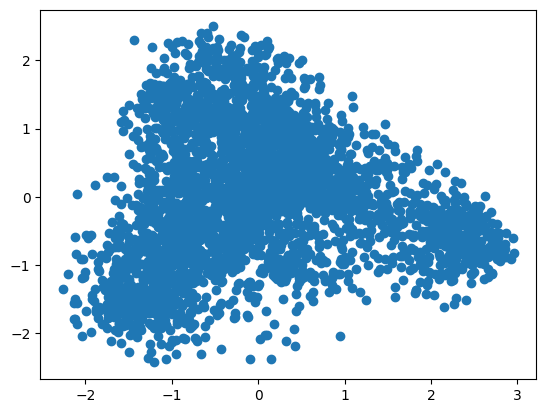

In [51]:
reduce_dim(Isomap(n_components=2, n_neighbors=10), tf_idf_matrix)